In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [186]:
train_data=pd.read_csv('/Users/musubimanagement/Desktop/Kaggle_project/health_insurance_prediction/train.csv')
train_data.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [187]:
test_data=pd.read_csv('/Users/musubimanagement/Desktop/Kaggle_project/health_insurance_prediction/test.csv')
test_data.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


In [188]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,50882.0,25441.500000,14688.512535,1.0,12721.25,25441.5,38161.75,50882.0
Region_Code,50882.0,1732.788707,1424.081652,1.0,523.00,1391.0,2667.00,6194.0
Upper_Age,50882.0,44.856275,17.310271,18.0,28.00,44.0,59.00,75.0
Lower_Age,50882.0,42.738866,17.319375,16.0,27.00,40.0,57.00,75.0
Holding_Policy_Type,30631.0,2.439228,1.025923,1.0,1.00,3.0,3.00,4.0
Reco_Policy_Cat,50882.0,15.115188,6.340663,1.0,12.00,17.0,20.00,22.0
Reco_Policy_Premium,50882.0,14183.950069,6590.074873,2280.0,9248.00,13178.0,18096.00,43350.4
Response,50882.0,0.239947,0.427055,0.0,0.00,0.0,0.00,1.0


In [189]:
train_data.shape

(50882, 14)

In [190]:
test_data.shape

(21805, 13)

In [191]:
missing_train_data=train_data.isna().sum()
missing_train_data

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [192]:
missing_test_data=test_data.isna().sum()
missing_test_data

ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

In [193]:
train_data['Health Indicator'].value_counts()

X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health Indicator, dtype: int64

In [194]:
train_data['Holding_Policy_Duration'].value_counts()

1.0     4499
14+     4335
2.0     4260
3.0     3586
4.0     2771
5.0     2362
6.0     1894
7.0     1645
8.0     1316
9.0     1114
10.0     813
11.0     546
12.0     513
13.0     511
14.0     466
Name: Holding_Policy_Duration, dtype: int64

In [195]:
s=15

In [196]:
train_data['Holding_Policy_Duration']=train_data['Holding_Policy_Duration'].replace('14+',15)
train_data['Holding_Policy_Duration']=train_data['Holding_Policy_Duration'].astype('float64')
train_data['Holding_Policy_Duration']

0        15.0
1         NaN
2         1.0
3        15.0
4         3.0
         ... 
50877     NaN
50878     7.0
50879    15.0
50880     2.0
50881     2.0
Name: Holding_Policy_Duration, Length: 50882, dtype: float64

In [197]:
test_data['Holding_Policy_Duration']=train_data['Holding_Policy_Duration'].replace(['14+'],15)
test_data['Holding_Policy_Duration']=test_data['Holding_Policy_Duration'].astype('float64')
test_data['Holding_Policy_Duration']

0        15.0
1         NaN
2         1.0
3        15.0
4         3.0
         ... 
21800     NaN
21801     NaN
21802     1.0
21803     2.0
21804     1.0
Name: Holding_Policy_Duration, Length: 21805, dtype: float64

In [198]:
train_data['Holding_Policy_Type'].value_counts()

3.0    13279
1.0     8173
2.0     5005
4.0     4174
Name: Holding_Policy_Type, dtype: int64

In [199]:
train_data['Holding_Policy_Type'].fillna(3.0,inplace=True)
train_data.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,15.0,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,3.0,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,15.0,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [200]:
test_data['Holding_Policy_Type'].fillna(3.0,inplace=True)
train_data.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,15.0,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,3.0,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,15.0,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [201]:
train_data['Holding_Policy_Duration'].fillna(1.0,inplace=True)
train_data.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,15.0,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,1.0,3.0,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,15.0,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [202]:
test_data['Holding_Policy_Duration'].fillna(1.0,inplace=True)
test_data.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,15.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,1.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,1.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,15.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,3.0,3.0,5,22534.0


In [203]:
train_data['Health Indicator'].fillna('X1',inplace=True)
train_data.head()


,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,15.0,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,1.0,3.0,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,X1,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,15.0,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [204]:
test_data['Health Indicator'].fillna('X1',inplace=True)
test_data.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,X1,15.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,1.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,1.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,15.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,3.0,3.0,5,22534.0


In [205]:
train_data.isna().sum(), test_data.isna().sum()

(ID                         0
 City_Code                  0
 Region_Code                0
 Accomodation_Type          0
 Reco_Insurance_Type        0
 Upper_Age                  0
 Lower_Age                  0
 Is_Spouse                  0
 Health Indicator           0
 Holding_Policy_Duration    0
 Holding_Policy_Type        0
 Reco_Policy_Cat            0
 Reco_Policy_Premium        0
 Response                   0
 dtype: int64,
 ID                         0
 City_Code                  0
 Region_Code                0
 Accomodation_Type          0
 Reco_Insurance_Type        0
 Upper_Age                  0
 Lower_Age                  0
 Is_Spouse                  0
 Health Indicator           0
 Holding_Policy_Duration    0
 Holding_Policy_Type        0
 Reco_Policy_Cat            0
 Reco_Policy_Premium        0
 dtype: int64)

In [206]:
from sklearn.preprocessing import OneHotEncoder
en = OneHotEncoder()
train_data['City_Code']=en.fit_transform(train_data['City_Code'].values.reshape(-1,1)).toarray()
train_data['Accomodation_Type']=en.fit_transform(train_data['Accomodation_Type'].values.reshape(-1,1)).toarray()
train_data['Reco_Insurance_Type']=en.fit_transform(train_data['Reco_Insurance_Type'].values.reshape(-1,1)).toarray()
train_data['Is_Spouse']=en.fit_transform(train_data['Is_Spouse'].values.reshape(-1,1)).toarray()
train_data['Health Indicator']=en.fit_transform(train_data['Health Indicator'].values.reshape(-1,1)).toarray()
train_data['Holding_Policy_Duration']=en.fit_transform(train_data['Holding_Policy_Duration'].values.reshape(-1,1)).toarray()

In [207]:
test_data['City_Code']=en.fit_transform(test_data['City_Code'].values.reshape(-1,1)).toarray()
test_data['Accomodation_Type']=en.fit_transform(test_data['Accomodation_Type'].values.reshape(-1,1)).toarray()
test_data['Reco_Insurance_Type']=en.fit_transform(test_data['Reco_Insurance_Type'].values.reshape(-1,1)).toarray()
test_data['Is_Spouse']=en.fit_transform(test_data['Is_Spouse'].values.reshape(-1,1)).toarray()
test_data['Health Indicator']=en.fit_transform(test_data['Health Indicator'].values.reshape(-1,1)).toarray()
test_data['Holding_Policy_Duration']=en.fit_transform(test_data['Holding_Policy_Duration'].values.reshape(-1,1)).toarray()

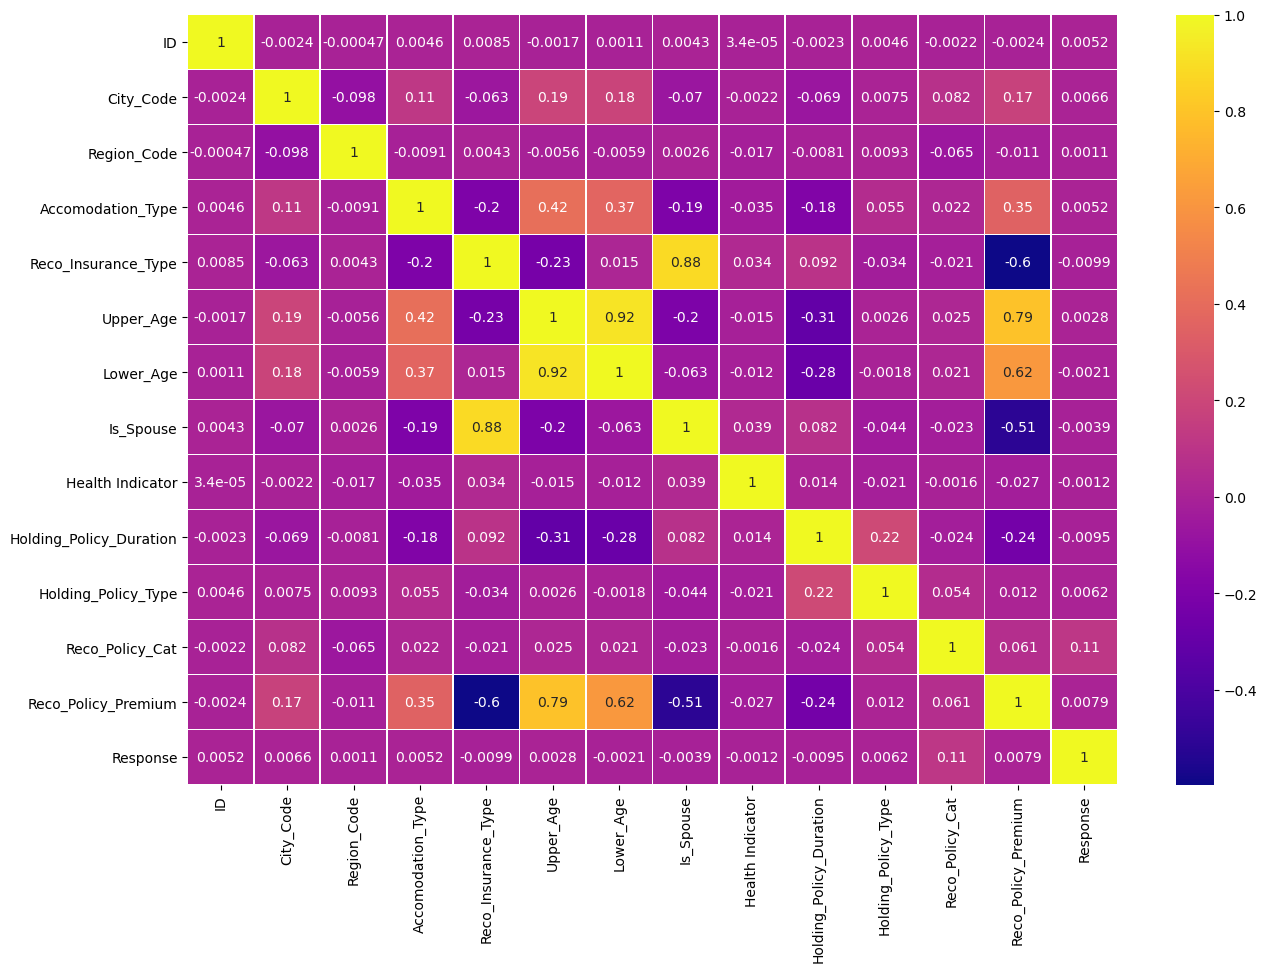

In [208]:
fig, ax = plt.subplots(figsize=(15,10)) 
corr_train=train_data.corr()
sns.heatmap(corr_train,annot=True, cmap="plasma",linewidth=0.5,ax=ax)
plt.show()

/Users/musubimanagement/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


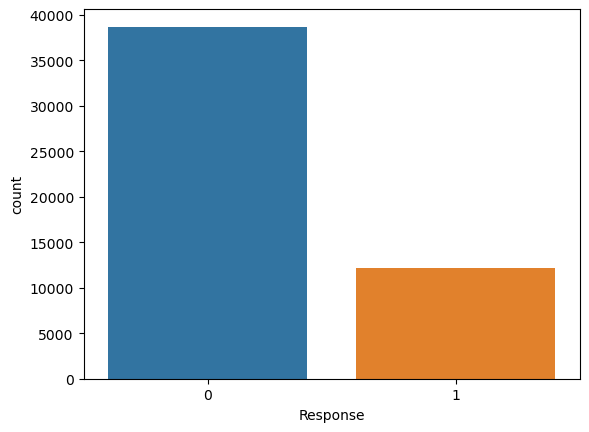

In [209]:
sns.countplot(train_data['Response'])
plt.show()

In [210]:
from sklearn.model_selection import train_test_split
train, test=train_test_split(train_data,test_size=0.25)

In [211]:
X_train=train.drop(['Response'],axis=1)
y_train=train['Response']
X_test=test.drop(['Response'],axis=1)
y_test=test['Response']

In [212]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
LR=model.score(X_test,y_test)
LR

0.7625186699158871

In [213]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0,max_depth=3)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred
#validation of built model
from sklearn.metrics import accuracy_score

print('The accuracy of the Decision Tree is {}%'.format(round(accuracy_score(pred,y_test)*100,2)))

The accuracy of the Decision Tree is 76.18%


In [214]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
xgbl=XGBClassifier()
xgbl.fit(X_train,y_train)
test_pred=xgbl.predict(X_test)
xgbl_score=xgbl.score(X_test,y_test)
print("The XGBoostclassifier model accuracy is {}".format(xgbl_score))

[15:28:07] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/musubimanagement/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


The XGBoostclassifier model accuracy is 0.7584309409637607


In [215]:
# Fitting Naive Bayes Classification to the Training set with linear kernel
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(X_train, y_train)

GaussianNB()

In [217]:
#Predicting the Test set results
y_pred = nvclassifier.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [218]:
#lets see the actual and predicted value 
test = test.reset_index(drop = True)
test["pred_species"] = y_pred
test.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,pred_species
0,20877,0.0,3587,1.0,0.0,34,33,0.0,0.0,1.0,1.0,21,12528.0,0,0
1,13187,0.0,4945,0.0,1.0,21,21,1.0,0.0,1.0,3.0,17,9660.0,0,0
2,31927,0.0,2903,1.0,0.0,68,45,1.0,0.0,0.0,3.0,22,27507.2,0,0
3,40071,0.0,10,1.0,1.0,54,54,1.0,0.0,0.0,3.0,4,10296.0,0,0
4,12145,0.0,838,1.0,1.0,34,34,1.0,1.0,1.0,3.0,16,7644.0,1,0


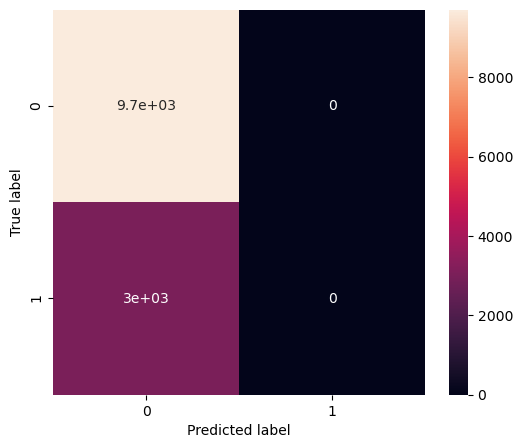

In [219]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [220]:
#finding accuracy from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred += cm[row,c]
        else:
            falsePred += cm[row,c]
print("*"*70)
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print("*"*70)
acc = corrPred/cm.sum()
print ('Accuracy of the Naive Bayes Clasification is {}% '.format(round(acc*100,2)))
print("*"*70)

**********************************************************************
Correct predictions:  9700
False predictions 3021
**********************************************************************
Accuracy of the Naive Bayes Clasification is 76.25% 
**********************************************************************


In [222]:
# Training with KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
test_accuracy=[]
for k in range(2,10):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  train_pred=knn.predict(X_train)
  train_score=accuracy_score(train_pred,y_train)
  test_pred= knn.predict(X_test)
  test_score=(round(accuracy_score(test_pred,y_test)*100,2))
  test_accuracy.append(test_score)
  print("Test Accuracy: ",test_score,"Value of K: ",k)

Test Accuracy:  73.41 Value of K:  2
Test Accuracy:  68.5 Value of K:  3
Test Accuracy:  73.93 Value of K:  4
Test Accuracy:  71.24 Value of K:  5
Test Accuracy:  74.48 Value of K:  6
Test Accuracy:  72.72 Value of K:  7
Test Accuracy:  74.82 Value of K:  8
Test Accuracy:  73.78 Value of K:  9
